#                              L&T EduTech
#           St.Vincent Palloti College of Engineering
#                             AIML Notebook - W2

### Classification and Regression implementation using Python

    > Classification is the process of finding a model or function that helps in separating the data into multiple categorical classes i.e. discrete values
    > In a classification task, we are supposed to predict discrete target variables(class labels) using independent features
    > Regression is the process of finding a model or function for distinguishing the data into continuous real values instead of using classes or discrete values
    > In a regression task, we are supposed to predict a continuous target variable using independent features.

Let us implement few Classfication & Regression Algorithms

    > Logistic Regression
    > KNN
    > SVM 
    > Decision Tree
    > Random Forest
    

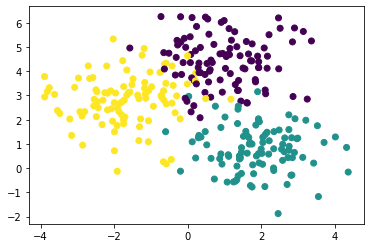

In [29]:
#Toy Dataset creation
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,centers=3,cluster_std=1.0,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)


In [44]:
#Logistic Reression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
#lr.get_params()
print("Accuray of training set:",lr.score(X_train,y_train))
print("Accuracy of testing set:",lr.score(X_test,y_test))
y_pred=lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuray of training set: 0.9375
Accuracy of testing set: 0.8833333333333333
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.95      0.91      0.93        22
           2       0.86      0.90      0.88        21

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1
----------------------------------------------------------
User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null obje

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


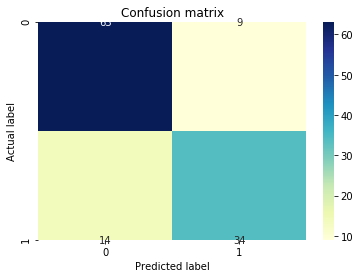

In [53]:
#Complete implementation with real dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

social_N_data = pd.read_csv('Social_Network_Ads.csv')
print(pd.concat([social_N_data.head(), social_N_data.tail()]))
print("----------------------------------------------------------")

#CHECK FOR NULL VALUES
print(social_N_data.isnull().any())
print("----------------------------------------------------------")

# CLEAN THE DATA
social_N_data.drop('User ID', axis=1, inplace=True)

# CHANGE CATEGORICAL VARIABLE TO DUMMIES
print(social_N_data.info())
print("----------------------------------------------------------")
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True) #explore oneHotEncoder
social_N_data.drop('Gender',axis=1,inplace=True)
social_N_data = pd.concat([social_N_data,gender], axis=1)

# SPLIT DATA TO INDEPENDENT AND DEPENDENT VARIABLES
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
y = social_N_data.iloc[:, 2] # Purchased
print("X",X)
print("y",y)
print("----------------------------------------------------------")
# FEATURE SCALING
sc = StandardScaler()
X = sc.fit_transform(X)

# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# FIT/TRAIN MODEL
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# PREDICTIONS
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)
print("----------------------------------------------------------")

# EVALUATE MODEL
# predic_proba()
# print(classifier.predict_proba(X) 

#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

#plot Confusion Matrix
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')
#0.8083333333333333

# classification report
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print('Classification report: \n', classification_report(y_test, y_pred,target_names=target_names))

63 TN predictions: zeros predicted correctly.
14 FN predictions: ones wrongly predicted as zeros.
9 FP predictions: zeros that were wrongly predicted as ones.
34 TP predictions: ones predicted correctly.

In [56]:
#KNN
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test,y_test)

#try reproducing the metrics for this classifier

0.8666666666666667

In [55]:
#SVM
from sklearn import svm
clf=svm.SVC().fit(X_train, y_train)
clf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.875

In [61]:
#decision tree
from sklearn.tree import DecisionTreeClassifier  
clf_tree= DecisionTreeClassifier()  
clf_tree.fit(X_train, y_train)
clf_tree.score(X_test,y_test)

#try reproducing the metrics for this classifier

0.8416666666666667

In [60]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier().fit(X_train,y_train)
rfclf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8416666666666667

#### Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# defining parameters
param_grid = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 3, 4, 6, 8], 
    "min_samples_leaf":list(range(1, 15)), 
}
# training model on the define params with GridSearchCV - Decision Tree
clf_tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(clf_tree, param_grid,scoring="accuracy",
                       n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train, y_train)
predictions = tree_cv.predict(X_test)
optimal_params = tree_cv.best_params_
print(f"\nOptimal paramters: ({optimal_params})")

print("\n====BEST MODEL SCORE====")
print('Best model score: ', tree_cv.best_score_)

print("\n====CLASSIFICATION REPORT====")
target_names = ['Bad Quality', 'Good Quality']
pd.DataFrame(classification_report(y_test, 
                                   predictions,
                                   target_names=target_names,
                                   output_dict=True))

Fitting 3 folds for each of 3920 candidates, totalling 11760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 5508 tasks      | elapsed:    5.9s



Optimal paramters: ({'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'})

====BEST MODEL SCORE====
Best model score:  0.9392857142857143

====CLASSIFICATION REPORT====


[Parallel(n_jobs=-1)]: Done 11760 out of 11760 | elapsed:    8.0s finished


,Bad Quality,Good Quality,accuracy,macro avg,weighted avg
precision,0.926471,0.826923,0.883333,0.876697,0.886652
recall,0.875000,0.895833,0.883333,0.885417,0.883333
f1-score,0.900000,0.860000,0.883333,0.880000,0.884000
support,72.000000,48.000000,0.883333,120.000000,120.000000


In [64]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 
#load the dataset and split it into training and testing sets
dataset = load_breast_cancer()
X=dataset.data
Y=dataset.target
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 
# train the model on train set without using GridSearchCV 
model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   9 out of  24 | elapsed:    0.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    9.6s finished


{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



    > Logistic regression common hyperparameters: penalty, max_iter, C, solver
    > Decision tree common hyperparameters: criterion, max_depth, min_samples_split, min_samples_leaf; max_features
    > Random forest common hyperparameters: n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, boostrap
    > Support vector machine common hyperparameters: c, kernel, gamma
    > KNN common hyperparameters: n_neighbors, weights, leaf_size, p